# Data Preprocessing Assignment 3 - Anurag Jawalkar_21BCE0369

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv("D:\\Courses\\AIML\\Data Sets\\Titanic-Dataset.csv")

### Checking for Null Values

In [3]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Data Visualization

<Axes: xlabel='Age', ylabel='Fare'>

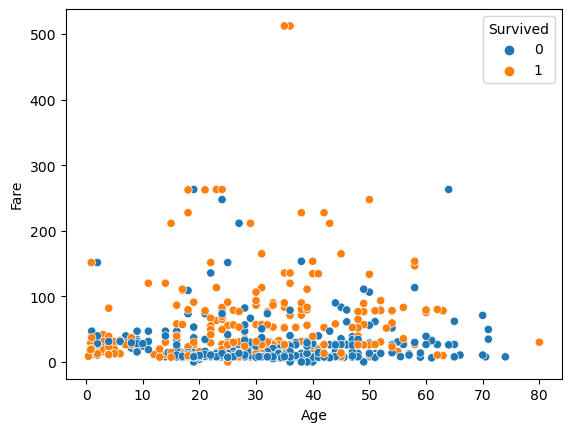

In [4]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")

### Inference: Helps identify if there's a correlation between age, fare, and survival.

<Axes: xlabel='Age', ylabel='Fare'>

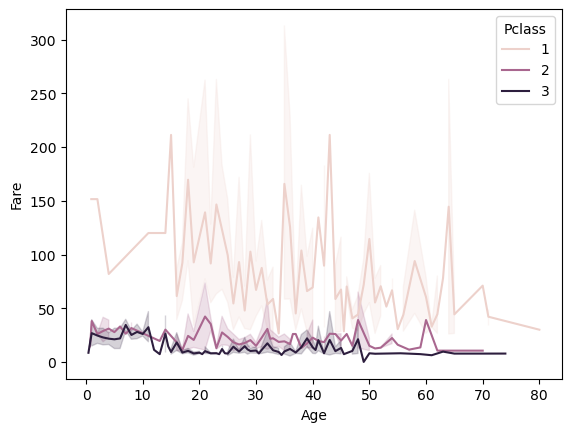

In [5]:
sns.lineplot(data=df, x="Age", y="Fare", hue="Pclass")

### Inference: Helps in analyzing how fares change with age within different passenger classes.

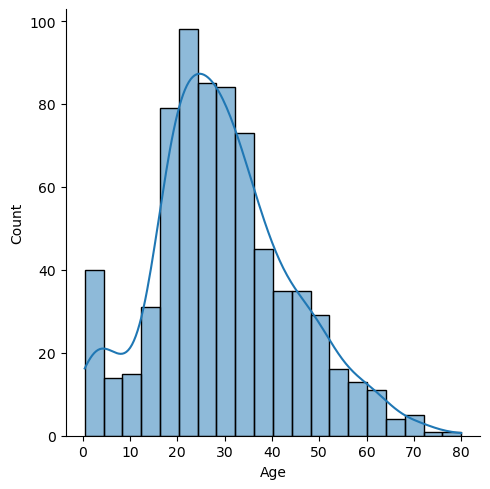

In [6]:
sns.displot(df["Age"].dropna(), bins=20, kde=True)

### Inference: Helps visualize the age distribution.

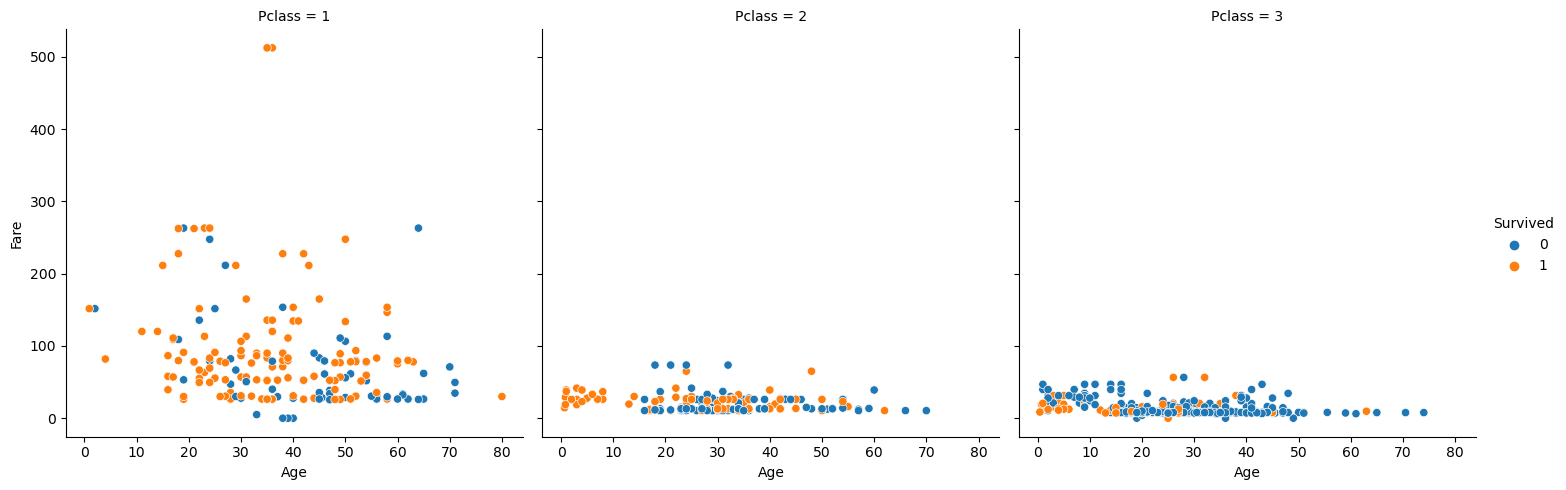

In [7]:
sns.relplot(data=df, x="Age", y="Fare", hue="Survived", col="Pclass", kind="scatter")

### Inference: Helps you to explore these relationships within different passenger classes.

<Axes: xlabel='Pclass', ylabel='Fare'>

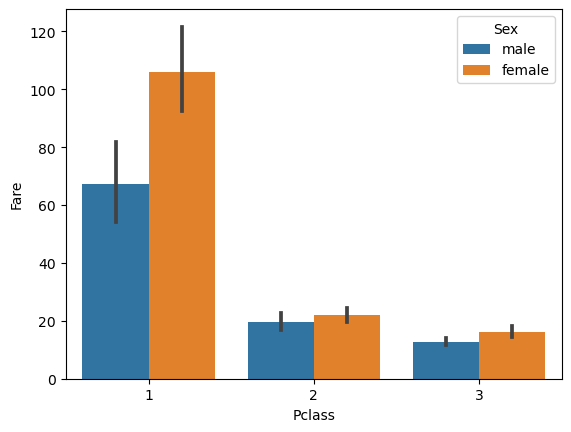

In [8]:
sns.barplot(data=df, x="Pclass", y="Fare", hue="Sex")

### Inference: Helps in comparing fare differences across passenger classes and genders.

<Axes: xlabel='Embarked', ylabel='count'>

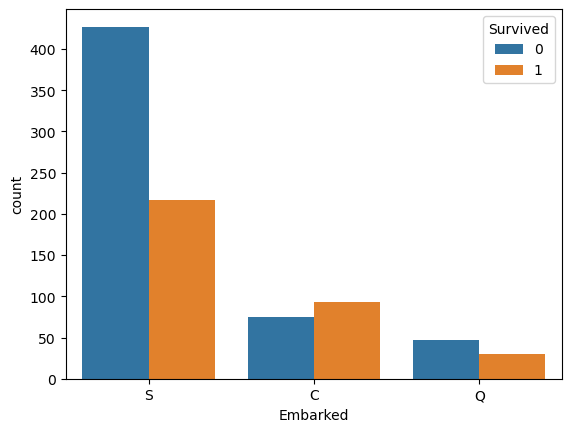

In [9]:
sns.countplot(data=df, x="Embarked", hue="Survived")


### Inference: Helps analyze how embarkation port might be related to survival.

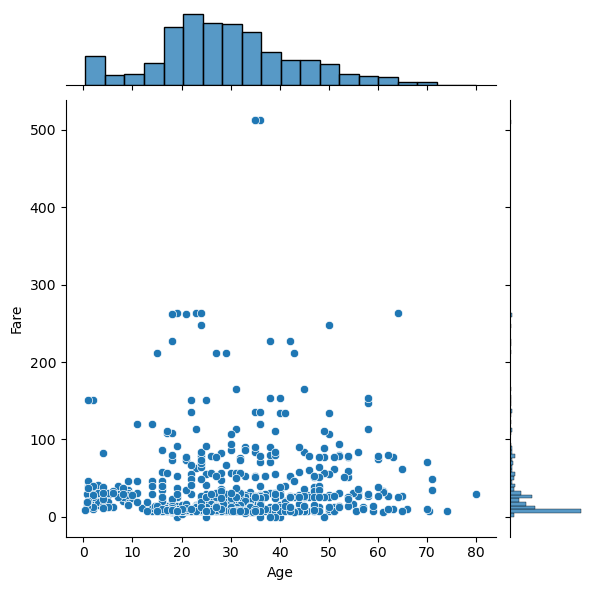

In [10]:
sns.jointplot(data=df, x="Age", y="Fare", kind="scatter")

### Inference: The jointplot provides a scatterplot with marginal histograms for Age vs. Fare.

<Axes: xlabel='Pclass', ylabel='Age'>

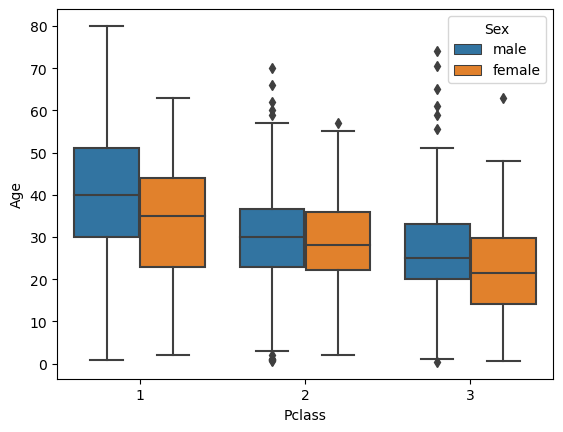

In [11]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex")

### Inference: Helps identify variations in age within different passenger classes and genders.

### Outlier Detection

In [12]:
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
fare_outliers = df[(df['Fare'] < lower_bound_fare) | (df['Fare'] > upper_bound_fare)]
age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

### Splitting Dependent and Independent variables

In [13]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

### Perform Encoding

In [14]:
X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

### Splitting Data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Printing the new data frame

In [18]:
print("Fare Outliers:")
print(fare_outliers)
print("\nAge Outliers:")
print(age_outliers)

Fare Outliers:
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...

# Thank You!